In [89]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation

g = 9.8; m = 1; k = 10; #gravitation, mass of object and constant of spring
N = 1000 
x = np.zeros(4)
time = np.linspace(0,25,N)
x[0], x[1], x[2], x[3] = x #L,L',theta,theta'
x0 = x[0]

#function for equation
def equation(x,time):
    f1 = x[1]
    f2 = (x0 + x[0])*x[3]*x[3] - k*x[0]/m + g*cos(x[2])
    f3 = x[3]
    f4 = -(g*sin(x[0]) + 2*x[1]*x[3])/(x0 + x[0])
    sol = np.array([f1,f2,f3,f4])
    return sol

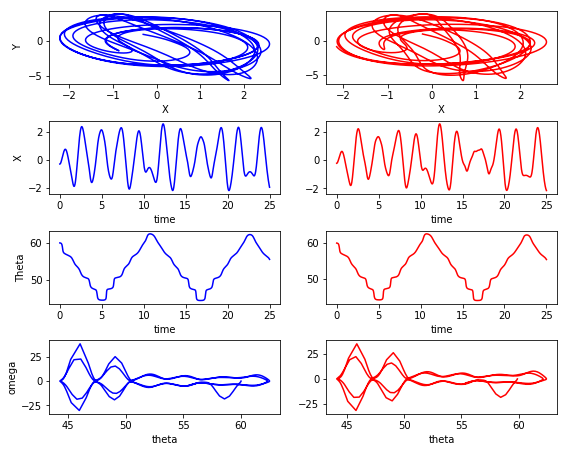

In [119]:
#initial condition for L,L',theta,theta'
x = [1,0,60,0]
y = [1,0,59.9,0]
solution=odeint(equation,x,time)
solution2=odeint(equation,y,time)

x1d = (x0 + solution[:,0])*np.sin(solution[:,2]) 
y1d = -(x0 + solution[:,0])*np.cos(solution[:,2]) 
x2d = (x0 + solution2[:,0])*np.sin(solution2[:,2]) 
y2d = -(x0 + solution2[:,0])*np.cos(solution2[:,2]) 

theta1 = solution[:,2]
theta2 = solution2[:,2]

omega1 = solution[:,3]
omega2 = solution2[:,3]

#plot
plt.subplot(4,2,1)
plt.plot(x1d,y1d,'b')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(4,2,2)
plt.plot(x2d,y2d,'r')
plt.xlabel('X')

plt.subplot(4,2,3)
plt.plot(time,x1d,'b')
plt.xlabel('time')
plt.ylabel('X')

plt.subplot(4,2,4)
plt.plot(time,x2d,'r')
plt.xlabel('time')

plt.subplot(4,2,5)
plt.plot(time,theta1,'b')
plt.xlabel('time')
plt.ylabel('Theta')

plt.subplot(4,2,6)
plt.plot(time,theta2,'r')
plt.xlabel('time')

plt.subplot(4,2,7)
plt.plot(theta1,omega1,'b')
plt.xlabel('theta')
plt.ylabel('omega')

plt.subplot(4,2,8)
plt.plot(theta2,omega2,'r')
plt.xlabel('theta')

plt.subplots_adjust(bottom=.1, right=1.3, top=1.5, wspace = 0.2, hspace = 0.5)
